In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# How likely is it that you roll doubles when rolling two dice?


outcomes = [1,2,3,4,5,6]
n_trials = 100_000
n_dice = 2

# create dataframe of 100k rolls (rows) of two dice (cols)
rolls = pd.DataFrame(np.random.choice(outcomes, (n_trials, n_dice)))

# filter down to rolls where values are equal
doubles = rolls[rolls[0] == rolls[1]]

# number of doubles rows / total rows to get probability
prob = len(doubles) / len(rolls)

# output result
print('The probability of rolling doubles is: ',prob)

The probability of rolling doubles is:  0.16661


In [68]:
# If you flip 8 coins, what is the probability of getting exactly 3 heads? 
# What is the probability of getting more than 3 heads?

outcomes = ['H', 'T']
n_trials = 100_000
n_coins = 8

# create dataframe of 100K flips (rows) of eight coins (rows)
flip = pd.DataFrame(np.random.choice(outcomes, (n_trials, n_coins)))

# count # of heads in each row
head_count = (flip == 'H').sum(axis=1)

# get rate of 'wins' where there are exactly 3 heads
win_rate = (head_count == 3).mean()
print('The probability of getting exactly 3 heads is: ',win_rate)

# get rate of 'wins' where there are > 3 heads
win2_rate = (head_count > 3).mean()
print('The probability of getting more than 3 heads is: ',win2_rate)


The probability of getting exactly 3 heads is:  0.21937
The probability of getting more than 3 heads is:  0.63651


In [69]:
# There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup.
# Assuming that Codeup randomly selects an alumni to put on a billboard, 
# what are the odds that the two billboards I drive past both have data science students on them?

p_ds = .25
n_billboards = 2
n_trials = 100_000

# create dataframe of 100K events (rows) of 2 billboards (cols)
data = pd.DataFrame(np.random.random((n_trials, n_billboards)))

# create a series where the number of DS billboards are totalled for each row
data = (data < p_ds).sum(axis=1)
# get probability where the sum is 2
win_prob = (data == 2).mean()

print('The probability of both billboards having DS students on them is: ', win_prob)

The probability of both billboards having DS students on them is:  0.06196


In [70]:
# Codeup students buy, on average, 3 poptart packages with a standard deviation 
# of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 
# 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? 
# (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a 
# judgement call on how to handle some of your values

# create dataframe of 100K trials of pop-tarts purchased for five days
data = pd.DataFrame(np.random.normal(3, 1.5, size=(100_000, 5)))

# sum the pop-tarts purchased for each week
sum_of_week = data.sum(axis=1)

# find rate where the sum is less than or = to the 17 stocked
in_stock_rate = (sum_of_week <= 17).mean()
print('The probability of Pop Tarts still being in stock is: ',in_stock_rate)

The probability of Pop Tarts still being in stock is:  0.72391


In [71]:
#Compare Heights
# Men have an average height of 178 cm and standard deviation of 8cm.
# Women have a mean of 170, sd = 6cm.
# Since you have means and standard deviations, you can use np.random.normal to generate observations.
# If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

trials = 100_000

# create 100K trials each for men and women
men = pd.Series(np.random.normal(178, 8, trials))
women = pd.Series(np.random.normal(170,6, trials))

# merge into a dataframe and change axis names for clarity
df=pd.concat([men,women],axis=1)
df.set_axis(['men', 'women'], axis=1, inplace=True)

# filter rows to those where women were taller, then get 
win_prob = (df.men < df.women).mean()

print('The likelihood a woman is taller than the man is: ', win_prob)


The likelihood a woman is taller than the man is:  0.21274


In [72]:
# When installing anaconda on a student's computer, there's a 1 in 250 chance that the download 
# is corrupted and the installation fails. What are the odds that after having 50 students 
# download anaconda, no one has an installation issue? 100 students?

# What is the probability that we observe an installation issue within the first 150 students that download anaconda?

# How likely is it that 450 students all download anaconda without an issue?

corrupt_prob = 1/250
trials = 100_000
students50 = 50
students100 = 100
students150 = 150
students450 = 450

data_50 = np.random.random((trials ,students50))
clear_50 = pd.DataFrame(data_50 > corrupt_prob).sum(axis = 1)
prob_50 = len(clear_50[clear_50 == 50]) / trials

print('The probability of no one having an issue out of 50 students is: ', prob_50)

data_100 = np.random.random((trials ,students100))
clear_100 = pd.DataFrame(data_100 > corrupt_prob).sum(axis = 1)
prob_100 = len(clear_100[clear_100 == 100]) / trials
print('The probability of no one having an issue out of 100 students is: ', prob_100)

data_150 = np.random.random((trials ,students150))
clear_150 = pd.DataFrame(data_150 > corrupt_prob).sum(axis = 1)
prob_150 = len(clear_150[clear_150 != 150]) / trials
print('The probability of having an issue in the first 150 students is: ', prob_150)

data_450 = np.random.random((trials ,students450))
clear_450 = pd.DataFrame(data_450 > corrupt_prob).sum(axis = 1)
prob_450 = len(clear_450[clear_450 == 450]) / trials
print('The probability of no one having an issue out of 450 students is: ', prob_450)

The probability of no one having an issue out of 50 students is:  0.81719
The probability of no one having an issue out of 100 students is:  0.66876
The probability of having an issue in the first 150 students is:  0.45285
The probability of no one having an issue out of 450 students is:  0.16527


In [73]:
# There's a 70% chance on any given day that there will be at least one food truck at Travis Park. 
# However, you haven't seen a food truck there in 3 days. How unlikely is this?

# How likely is it that a food truck will show up sometime this week?

p_truck = .7
trials = 100_000
days = 3
weekdays = 5

data = np.random.random((trials,days))
truck_data = (data <= .7).sum(axis=1)
no_truck_prob = (truck_data == 0).mean()
print('The probability of no truck for 3 days is: ', no_truck_prob)

data = np.random.random((trials,weekdays))
truck_data = (data <= .7).sum(axis=1)
truck_prob = (truck_data >= 1).mean()
print('The probability of a truck sometime this week is: ', truck_prob)

The probability of no truck for 3 days is:  0.02649
The probability of a truck sometime this week is:  0.99753


In [74]:
# If 23 people are in the same room, what are the odds that two of them share a birthday? 
# What if it's 20 people? 40?

# create function to check:
def birthday(students):
    """
    Function takes in a number of students and prints a statement with 
    odds that two students share a birthday
    """
    
# function to apply to dataframe that looks for rows with duplicates
    def check_for_dups(df):
        if len(df) != len(df.unique()):
            return True
        return False


    b_days = list(range(1,366))
    trials = 100_000
    # create dataframe with 100K rows of student birthdays (however many are passed to function)
    data = pd.DataFrame(np.random.choice(b_days, (trials, students)))
    # apply check function to look for lines with dups and return the proportion of Trues
    match_rate = data.apply(check_for_dups, axis=1).mean()
    print('Odds of sharing a birthday for', students, 'people are: ', match_rate)

In [75]:
birthday(23)
birthday(20)
birthday(40)

Odds of sharing a birthday for 23 people are:  0.50415
Odds of sharing a birthday for 20 people are:  0.40952
Odds of sharing a birthday for 40 people are:  0.89168


In [76]:
# # Bonus problem 1
# Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage. 
# "6d4" means rolling six 4-sided dice and summing the result.
# Your opposing mage has 4d6 health points and spells that do 4d6. 
# "4d6" means rolling four six-sided dice and summing the result.outcomes6 = [1,2,3,4,5,6]

outcomes4 = [1,2,3,4]
outcomes6 = [1,2,3,4,5,6]
simulations = 100_000

wizard_roll = np.random.choice(outcomes6, (simulations, 4))
mage_roll = np.random.choice(outcomes4, (simulations, 6))

wizard_sums = wizard_roll.sum(axis=1)
mage_sums = mage_roll.sum(axis=1)

wizard_win = (wizard_sums > mage_sums).sum() 
mage_win = (mage_sums > wizard_sums).sum()
print('the wizard wins ', wizard_win, 'times')
print('the mage wins ', mage_win, 'times')
print('they tie ', simulations - wizard_win - mage_win, 'times')
print('out of ',simulations, 'duels')

the wizard wins  36699 times
the mage wins  54533 times
they tie  8768 times
out of  100000 duels


In [77]:
# # Bonus problem 2
# Rules:  The player pays $1 to play and picks a number.  The House rolls 3 dice at once.
# Payouts:

# $3 if all three dice match the chosen number
# $2 if exactly two dice match the chosen number
# $1 is exactly one of the dice matches the chosen number
# If none of the dice match the player's chosen number, then the House keeps the $1.

outcomes = [1,2,3,4,5,6]
simulations = 100_000

# create 100K rolls of three dice
roll = np.random.choice(outcomes, (simulations, 3))
payouts = (roll == 1).sum(axis=1) 
expected_profit = (payouts - 1).mean()

one_dollar_rate = (payouts == 2).mean()
two_dollar_rate = (payouts == 3).mean()
break_even_rate = (payouts == 1).mean()
lose_rate = (payouts == 0).mean()
print('chances of $2 outcome is ', two_dollar_rate)
print('chances of $1 outcome is ', one_dollar_rate)
print('chances of break-even outcome is ', break_even_rate)
print('chances of -$1 outcome is ', lose_rate)
print('expected profit is ', expected_profit)
print('profit over 1 million games is ', end='')
profit = str(int((expected_profit * 100_000_000)))
profit = profit.replace('-', '-$')
print((profit))

chances of $2 outcome is  0.00489
chances of $1 outcome is  0.06987
chances of break-even outcome is  0.34697
chances of -$1 outcome is  0.57827
expected profit is  -0.49862
profit over 1 million games is -$49862000


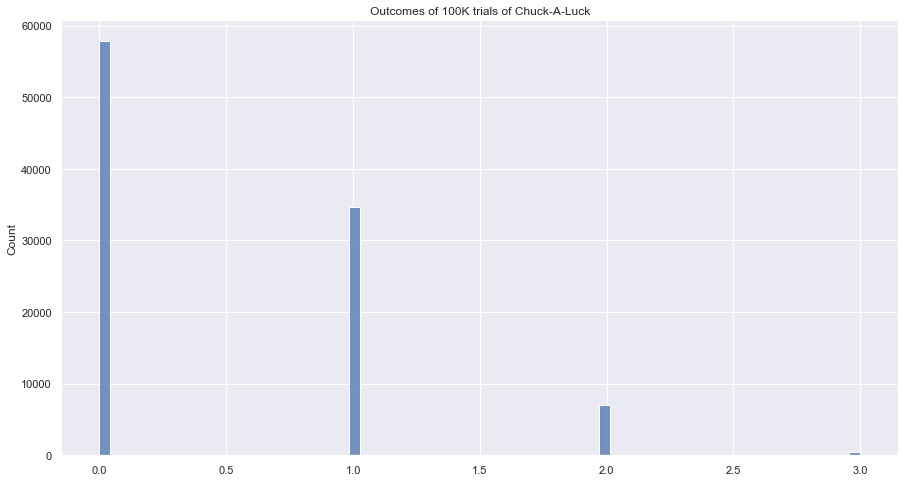

In [78]:
#Chart out a histogram of all the outcomes of those 1,000,000 games

sns.histplot(payouts)
plt.title('Outcomes of 100K trials of Chuck-A-Luck')
plt.show()